In [22]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
from astropy.time import Time
from astropy.table import Table
from astropy import units as u
from astropy import constants as const
from astropy.cosmology import WMAP9 as cosmo
from thesis import output_folder, big_fontsize, base_width, base_height, dpi
import seaborn as sns

In [2]:
path = ["data/ZTF19aatubsj_20200430_NOT_v1.ascii", "data/ZTF19aapreis_20190513_NTT_v1.ascii", "ZTF19aapreis_20191003_P200_v1.ascii"]

In [3]:
redshift = 1 + 0.2666

In [4]:
data = pd.read_table(path[0], names=["wl", "flux", "sky_flux", "flux_unc", "xpixel", "ypixel", "response", "flag"], sep="\s+", comment='#')
        
mask = data["flux"] > 0.
data["flux"][~mask] = 0.00

comp = pd.read_table('data/2017bgt_2017-02-23_13-45-10_FTN_FLOYDS-N_LCOGT_SN-KP.ascii', names=["wl", "flux"], sep="\s+", comment='#')

comp_redshift = 1. + 0.064

# dat = Table.read('data/spec-0391-51782-0220.fits', format='fits')
# sdss = dat.to_pandas()
# print(sdss)
# sdss = pd.read_table('data/spec-0391-51782-0001.fits')

In [5]:
smooth = 1

f = np.array(list(data["flux"]))
sf = np.zeros(len(f) - smooth)
swl = np.zeros(len(f) - smooth)

for i in range(smooth):
    sf += np.array(list(f)[i:-smooth+i])
    swl += np.array(list(data["wl"])[i:-smooth+i])
    
sf /= float(smooth)
swl /= float(smooth)

# sdss_smooth = 10

# sdssf = np.array(list(sdss["flux"]))
# ssf = np.zeros(len(sdssf) - sdss_smooth)
# sswl = np.zeros(len(sdssf) - sdss_smooth)

# for i in range(sdss_smooth):
#     ssf += np.array(list(sdssf)[i:-sdss_smooth+i])
#     sswl += np.array(list(10.**sdss["loglam"])[i:-sdss_smooth+i])
    
# ssf /= float(sdss_smooth)
# sswl /= float(sdss_smooth)


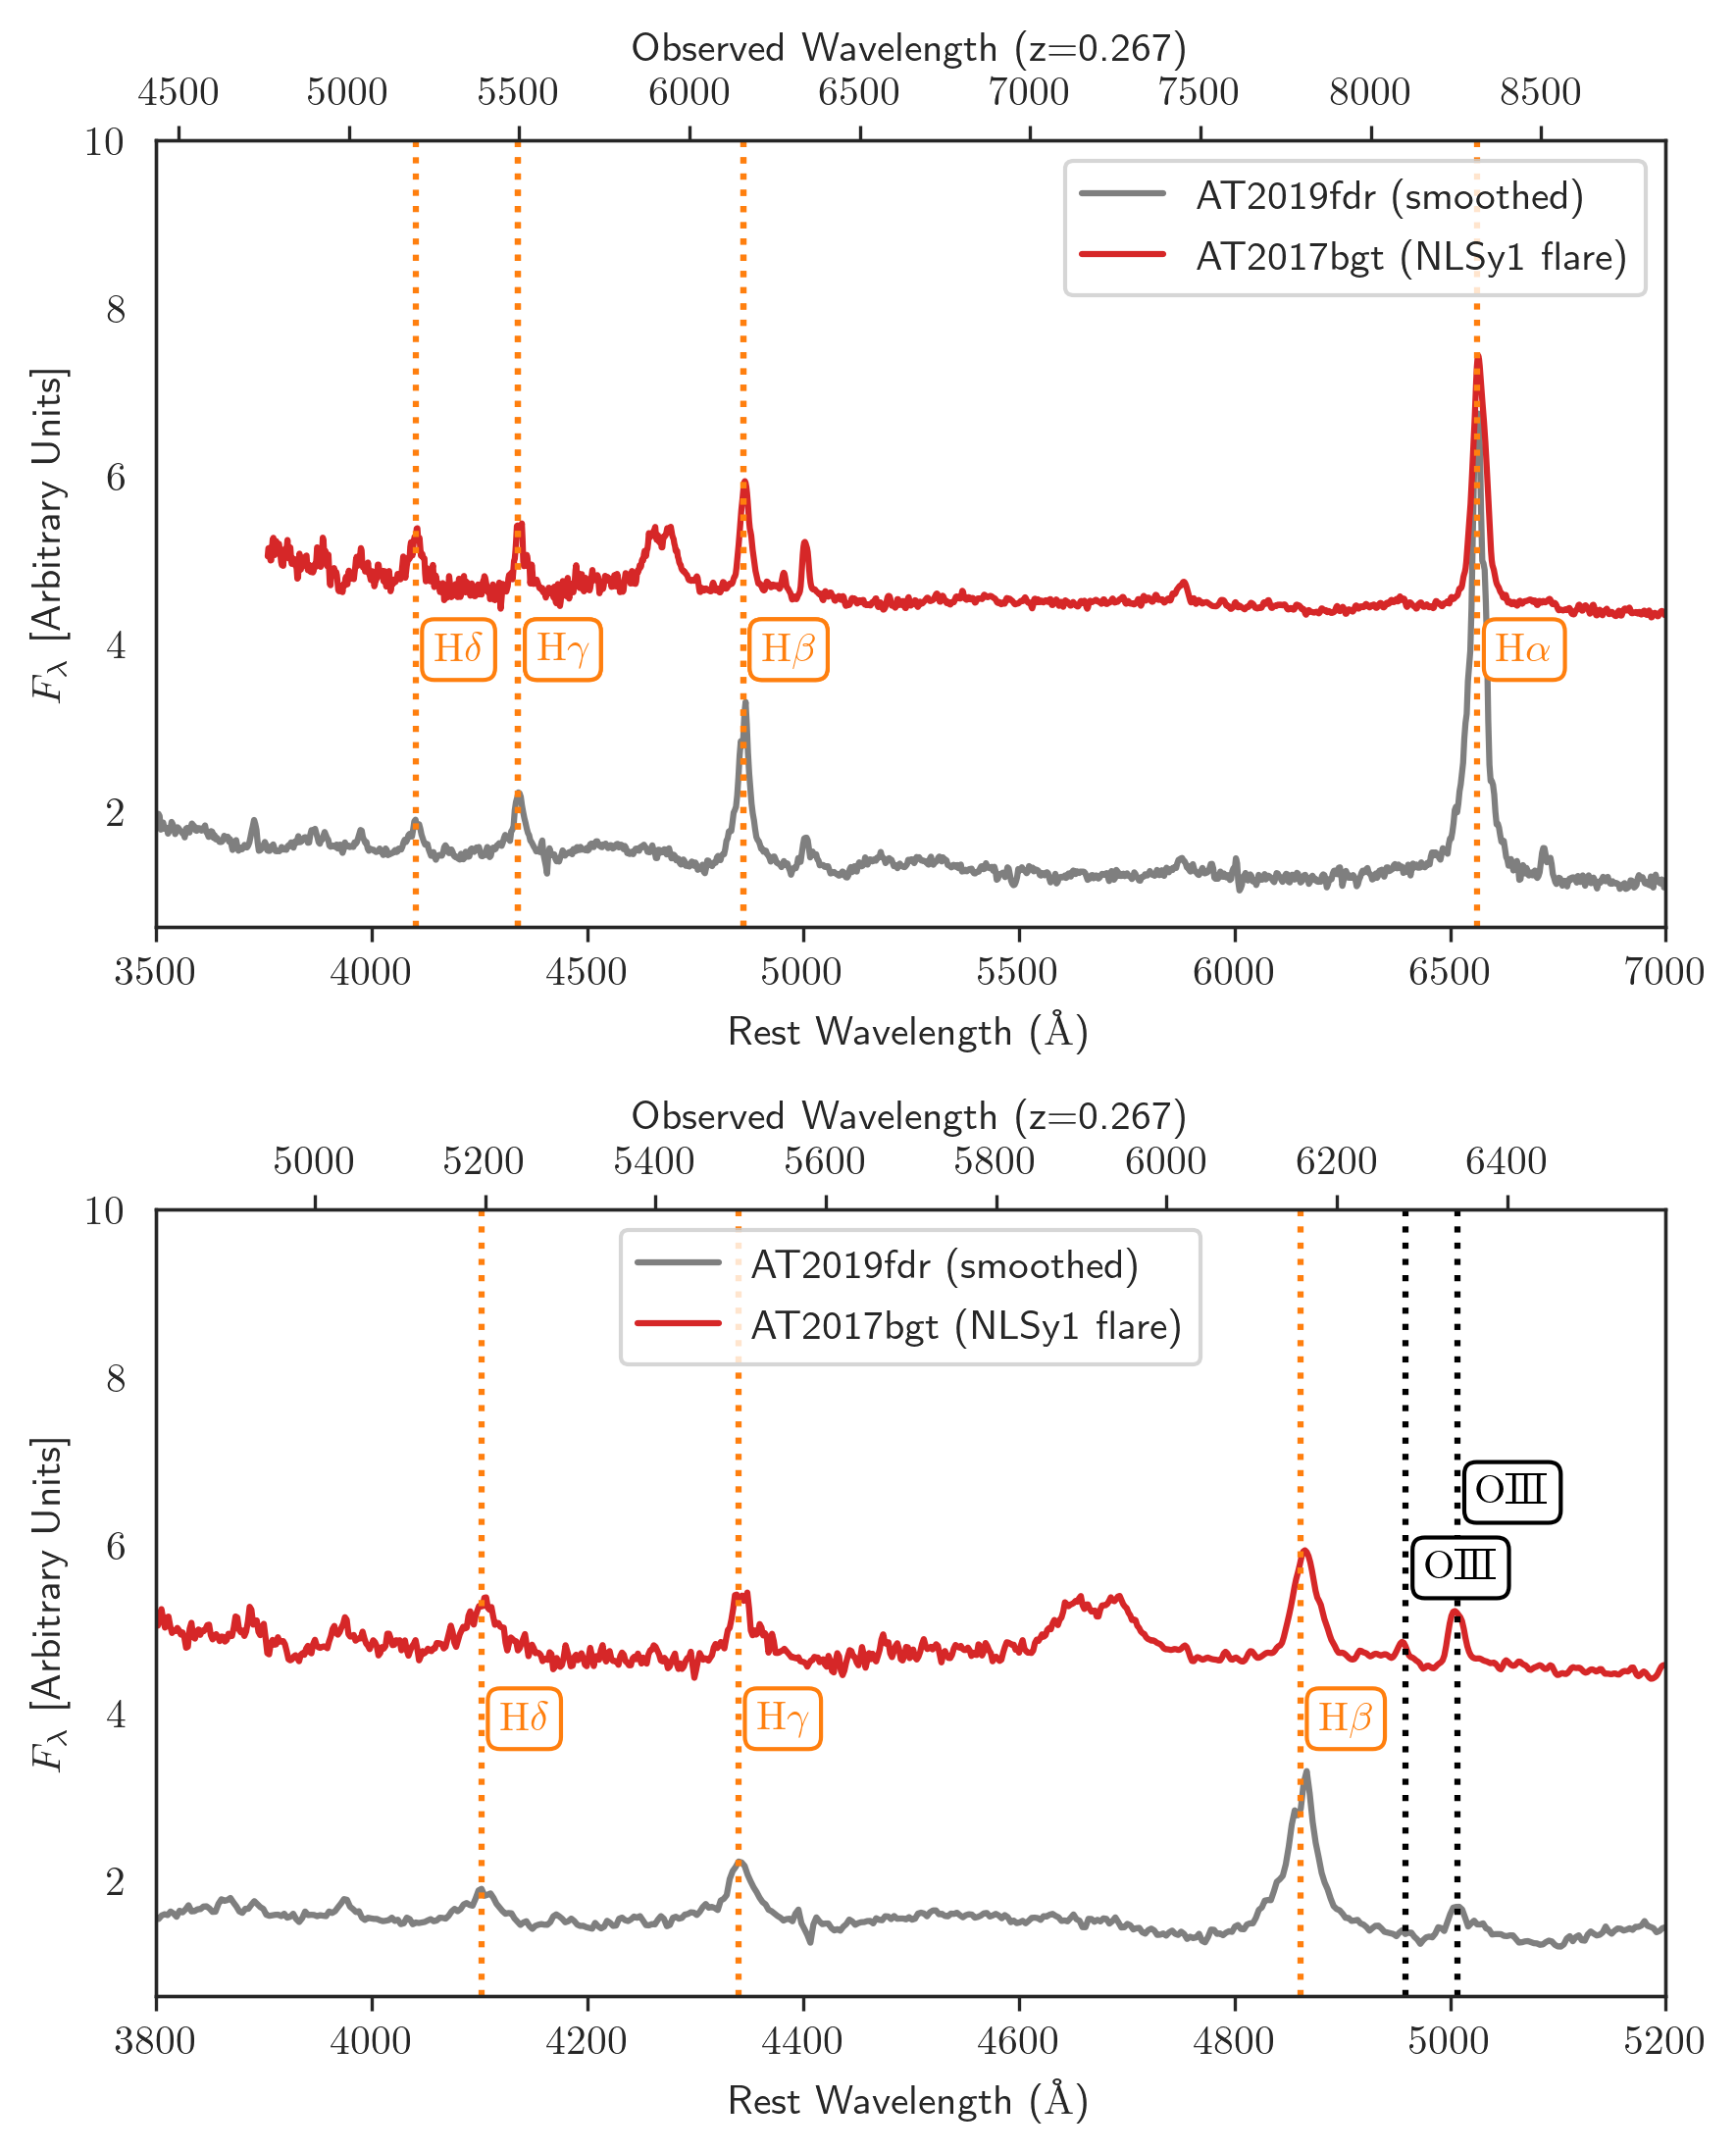

In [6]:
plt.figure(figsize=(base_width, 2*base_height), dpi=dpi)


lines_full = [
    (r"$\rm{H\alpha}$", 6562.8, 0),
    (r"$\rm{H\beta}$", 4861, 0),
    (r"$\rm{H\gamma}$", 4340, 0),
    (r"$\rm{H\delta}$", 4101.7, 0),
    (r"$\rm{H\beta}$", 4861, 0),
    (r"$\rm{H\gamma}$", 4340, 0),
#     (r"$\rm{He\Romanbar{II}}$", 4686, 1),
#     (r"$\rm{N\Romanbar{III}}$", 4640, 2),
#     (r"$\rm{N\Romanbar{III}}$", 4100, 2),
]

lines_zoom = [
    (r"$\rm{H\alpha}$", 6562.8, 0),
    (r"$\rm{H\beta}$", 4861, 0),
    (r"$\rm{H\gamma}$", 4340, 0),
    (r"$\rm{H\delta}$", 4101.7, 0),
    (r"$\rm{O\Romanbar{III}}$", 4959, 2),
    (r"$\rm{O\Romanbar{III}}$", 5007, 3)
]

params = [
    (lines_full, 3500., 7000.),
    (lines_zoom, 3800., 5200.)
]


for i, (lines, xl, xr) in enumerate(params):
    
    x_scale = (xr-xl)/80.
        
    ax1 = plt.subplot(2, 1, i+1)
    cols = ["C1", "C7", "k", "k"]
    # cols = [":", "--", "-.", "-"]

    plt.plot(data["wl"]/redshift, data["flux"]/np.mean(data["flux"]) + 0.5, linewidth=0.5, color="C0", alpha=0.5)
    plt.plot(swl/redshift, sf/np.mean(sf) + 0.5, color="C7", label="AT2019fdr (smoothed)")
    plt.plot(comp["wl"]/comp_redshift, comp["flux"]/np.mean(comp["flux"]) + 3.5, color="C3",label="AT2017bgt (NLSy1 flare)")
    plt.legend()

    for (label, wl, col) in lines:
        plt.axvline(wl, linestyle=":", color=cols[col])

        bbox = dict(boxstyle="round", fc="white", ec=cols[col])

        plt.annotate(label, (wl + x_scale, 3.8 + 0.9*col), fontsize=big_fontsize, bbox=bbox, color=cols[col])

    plt.ylabel(r"$F_{\lambda}$ [Arbitrary Units]", fontsize=big_fontsize)
    ax1b = ax1.twiny()
    ax1.set_xlim(left=xl, right=xr)
    ax1.set_ylim(top=10)
    rslim = ax1.get_xlim()
    ax1b.set_xlim((rslim[0] * redshift, rslim[1] * redshift))
    ax1.set_xlabel(r"Rest Wavelength ($\rm \AA$)", fontsize=big_fontsize)
    ax1b.set_xlabel(rf"Observed Wavelength (z={redshift-1.:.3f})", fontsize=big_fontsize)
    ax1.tick_params(axis='both', which='major', labelsize=big_fontsize)
    ax1b.tick_params(axis='both', which='major', labelsize=big_fontsize)

plt.tight_layout()
# sns.despine(right=True, top=False)

filename = "at2019fdr_spectrum.pdf"

output_path = os.path.join(output_folder, f"ztf_too/{filename}")

plt.savefig(f"plots/{filename}")
plt.savefig(output_path)
plt.show()

In [18]:
def mag_to_flux(mab):
    return 10. ** ((48.6 + mab)/-2.5)

Filters are ['ZTF_r', 'U', 'UVW2', 'J', 'H', 'UVM2', 'W1', 'UVW1', 'W2', 'Ks', 'ZTF_g', 'B', 'ZTF_i', 'V']
distance is 1372844627.476227 pc, delta = 40.68810694238199
1437370945006472.5 Hz
749    7.679603e-12
750    1.482792e-11
751    1.735495e-11
Name: mag, dtype: float64
851441232604373.6 Hz
19     4.785029e-13
25     3.202886e-13
31     2.490061e-13
36     3.176320e-13
43     3.837449e-13
49     3.635716e-13
55     3.690734e-13
61     3.673953e-13
67     3.255078e-13
73     2.549600e-13
79     3.593395e-13
85     2.481984e-13
91     2.243538e-13
96     1.869777e-13
103    8.458430e-14
Name: mag, dtype: float64
634790391089842.6 Hz
17     9.408680e-13
23     7.485583e-13
29     7.310226e-13
34     6.603326e-13
41     8.594854e-13
47     7.495871e-13
53     8.826208e-13
59     8.459166e-13
65     7.349055e-13
71     1.052830e-12
77     8.308894e-13
83     6.476635e-13
89     8.039783e-13
95     6.105606e-13
102    2.220553e-13
Name: mag, dtype: float64


<ipython-input-27-34bdd616e6f5>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs["band"][mask] = f
/opt/anaconda3/envs/thesis_code/lib/python3.9/site-packages/pandas/core/series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
<ipython-input-27-34bdd616e6f5>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs["band"][mask] = f
/opt/anaconda3/envs/thesis_code/lib/python3.9/site-packages

472888601804530.2 Hz
104    4.466071e-14
105    5.001184e-14
106    6.013225e-14
107    4.697189e-14
113    1.160893e-13
           ...     
722    1.385098e-13
726    1.352861e-13
730    1.079348e-13
741    1.838792e-13
742    1.196955e-13
Name: mag, Length: 275, dtype: float64
380153000849596.06 Hz
108    4.841937e-14
109    7.426311e-14
110    8.632412e-14
111    8.234999e-14
112    7.623685e-14
           ...     
739    1.532164e-13
740    2.690786e-13
743    1.035594e-13
744    1.095312e-13
745    1.133118e-13
Name: mag, Length: 258, dtype: float64
140740364582110.78 Hz
129    9.348584e-14
149    1.474278e-13
161    1.905384e-13
174    2.075708e-13
193    2.322294e-13
           ...     
734    1.132392e-13
735    5.551067e-14
736    8.301263e-14
737    5.359864e-14
738    5.795068e-14
Name: mag, Length: 109, dtype: float64
65132627531068.04 Hz
2    2.888009e-13
5    2.052100e-13
7    1.386113e-13
Name: mag, dtype: float64


<ipython-input-27-34bdd616e6f5>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs["band"][mask] = f
/opt/anaconda3/envs/thesis_code/lib/python3.9/site-packages/pandas/core/series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


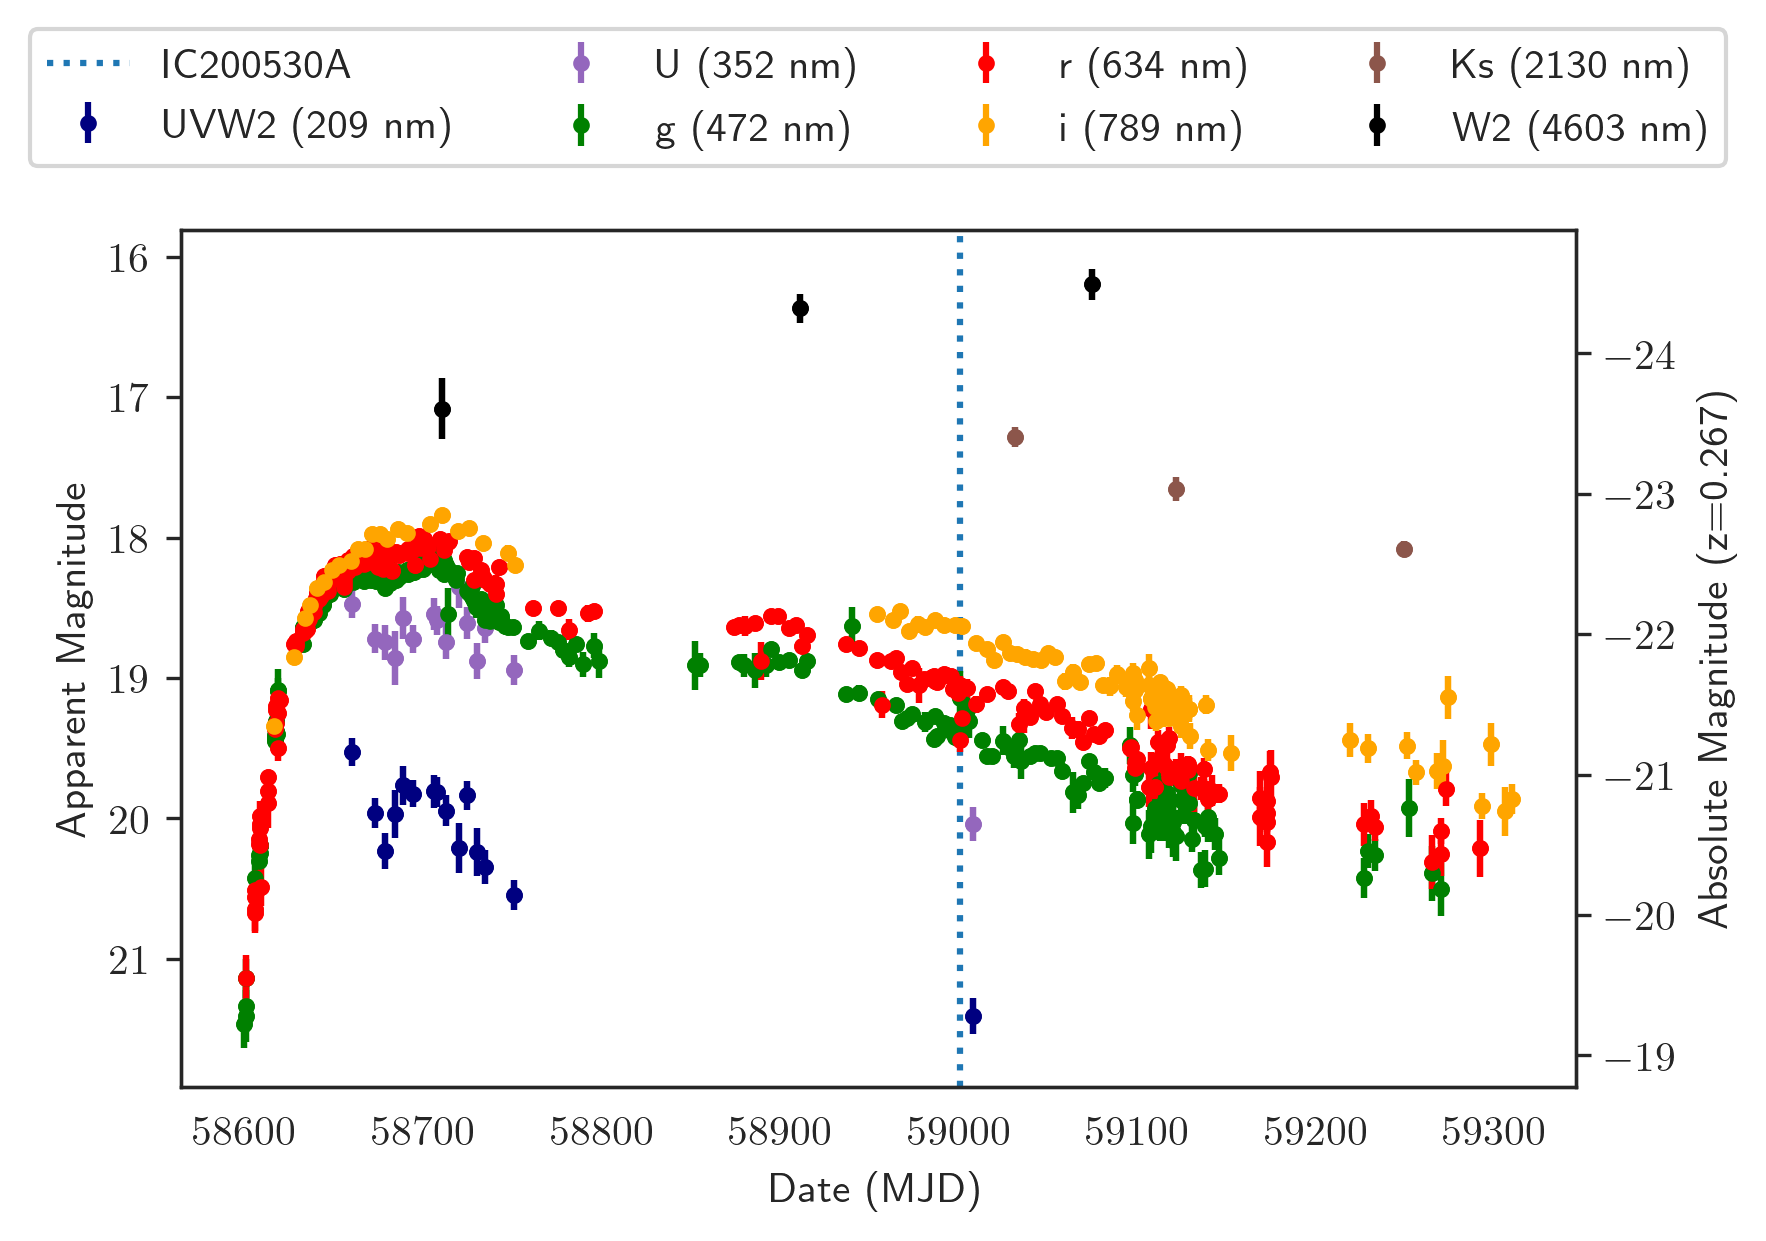

In [27]:
photometry = pd.read_csv("data/at2019fdr.csv", sep=",", index_col=0)

det_mask = np.logical_and(photometry["mag"] != 99., photometry["telescope"] != "P200_sextractor")
obs = photometry[det_mask]
lim = photometry[~det_mask]

print(f"Filters are {list(set(obs['band']))}")

plt.figure(figsize=(base_width, base_height), dpi=dpi)
ax = plt.subplot(111)
ax1b = ax.twinx()

wlmap = {
    "P48+ZTF_g": 4722.7,
    "P48+ZTF_r": 6339.6,
    "P48+ZTF_i": 7886.1,
    "Swift+V": 5411.4,
    "Swift+B": 4346.3,
    "Swift+U": 3521.0,
    "Swift+UVW1": 2684.1,
    "Swift+UVM2": 2245.8,
    "Swift+UVW2": 2085.7,
    "P200+J": 12063.0,
    "P200+H": 15696.2,
    "P200+Ks": 21301.1,
    "WISE+W1": 33526,
    "WISE+W2": 46028
}

cmap = {
    "g": "g",
    "r": "r",
    "i": "orange",
    "W2": "k",
    "Ks": "C5",
    "U": "C4",
    "UVW2": "navy"
}

fmap = {
    "ZTF_g": "g",
    "ZTF_r": "r",
    "ZTF_i": "i"
}

alpha=0.3
markersize=3.

d = cosmo.luminosity_distance(redshift - 1.).to("pc")
delta = 5 * np.log10(d / (10. * u.pc))
print(f"distance is {d}, delta = {delta}")

for f in ["UVW2", "U", "ZTF_g", "ZTF_r", "ZTF_i", "Ks", "W2"]:
    
    wl = None
    
    for key in wlmap.keys():
        if f == key.split("+")[1]:
            wl = wlmap[key]
    
    mask = obs["band"] == f
    
    if f in fmap.keys():
        obs["band"][mask] = f
        f = fmap[f]
    
    if np.logical_and(np.sum(mask) > 0, f in cmap.keys()):
                
        c = None
    
        df = obs[mask]
        ax.errorbar(df["obsmjd"], df["mag"], color=cmap[f], yerr=df["mag_err"], marker="o", linestyle=" ", label=f'{f.replace("_", "-")} ({wl/10.:.0f} nm)', markersize=markersize)
        ax1b.errorbar(df["obsmjd"], df["mag"] - delta, color=cmap[f], yerr=df["mag_err"], marker="o", linestyle=" ", markersize=markersize)

#         delta = np.mean(df["magpsf"] - df["absmag"])

#         ldf = lim[lim["filter"] == f]
#         ax.errorbar(ldf["jdobs"]-2400000.5, ldf["limmag"], color=cmap[f], linestyle=" ", uplims=True, alpha=alpha)
#         ax1b.errorbar(ldf["jdobs"]-2400000.5, ldf["limmag"] - delta, color=cmap[f], linestyle=" ", uplims=True, marker="v", alpha=alpha)

ax.invert_yaxis()
ax1b.invert_yaxis()
ax.set_ylabel(r"Apparent Magnitude", fontsize=big_fontsize)
ax1b.set_ylabel(rf"Absolute Magnitude (z={redshift-1.:.3f})", fontsize=big_fontsize)
ax.tick_params(axis='both', which='major', labelsize=big_fontsize)
ax1b.tick_params(axis='both', which='major', labelsize=big_fontsize)
ax.set_xlabel("Date (MJD)", fontsize=big_fontsize)

t_neutrino = Time("2020-05-30T23:03:55.56", format='isot', scale='utc')

ax.axvline(t_neutrino.mjd, linestyle=":", label="IC200530A")

ax.legend(loc="lower center", fontsize=big_fontsize, ncol=4, bbox_to_anchor=(0.5, 1.05))

filename = "at2019fdr_lightcurve.pdf"

output_path = os.path.join(output_folder, f"ztf_too/{filename}")

plt.savefig(f"plots/{filename}")
plt.savefig(output_path, bbox_inches='tight', pad_inches=0)

# plt.yscale("log")

Filters are ['ZTF_r', 'U', 'UVW2', 'J', 'H', 'UVM2', 'W1', 'UVW1', 'W2', 'Ks', 'ZTF_g', 'B', 'ZTF_i', 'V']
distance is 1372844627.476227 pc, delta = 40.68810694238199


<ipython-input-49-119e594a8db3>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs["band"][mask] = f
/opt/anaconda3/envs/thesis_code/lib/python3.9/site-packages/pandas/core/series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
<ipython-input-49-119e594a8db3>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs["band"][mask] = f
/opt/anaconda3/envs/thesis_code/lib/python3.9/site-packages

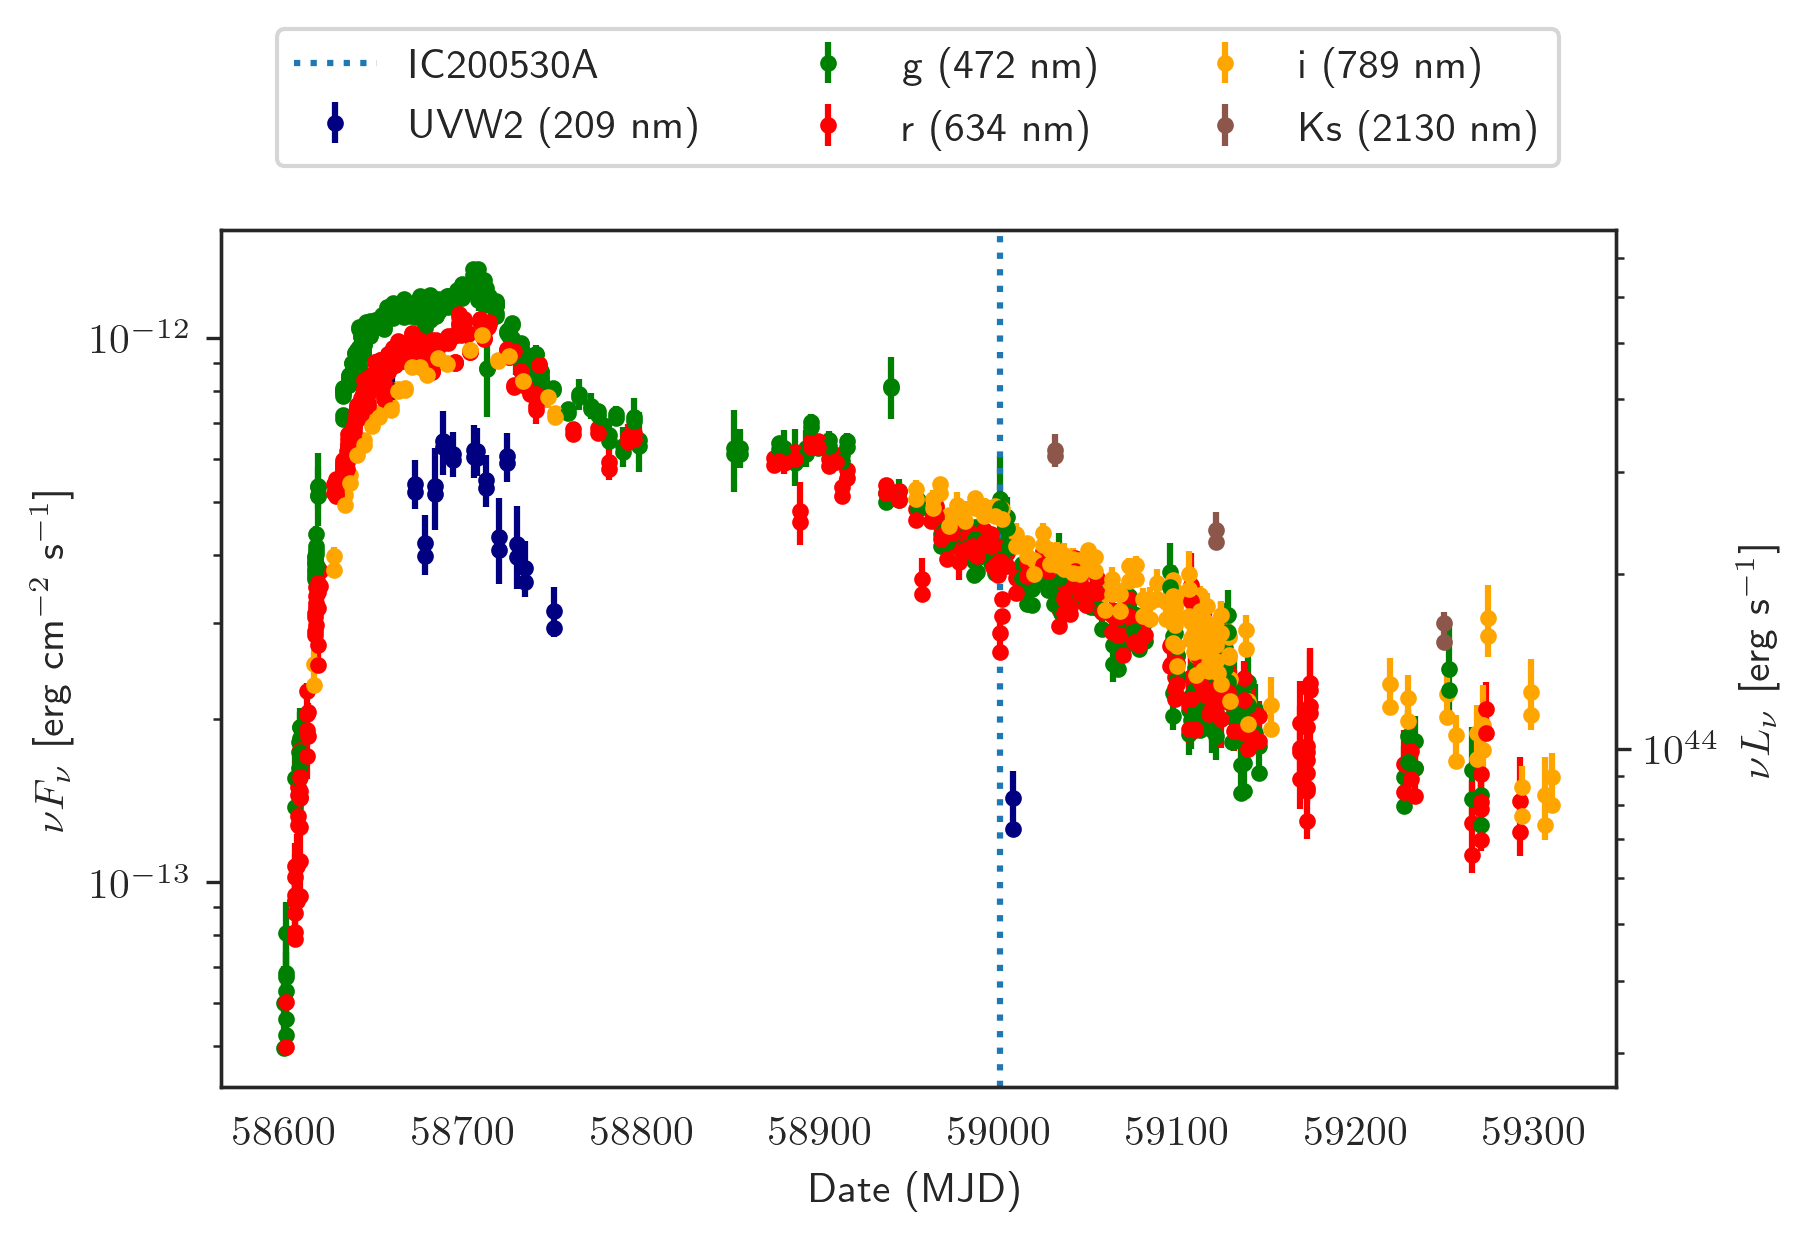

In [49]:
photometry = pd.read_csv("data/at2019fdr.csv", sep=",", index_col=0)

det_mask = np.logical_and(photometry["mag"] != 99., photometry["telescope"] != "P200_sextractor")
obs = photometry[det_mask]
lim = photometry[~det_mask]

print(f"Filters are {list(set(obs['band']))}")

plt.figure(figsize=(base_width, base_height), dpi=dpi)
ax = plt.subplot(111)
ax1b = ax.twinx()

wlmap = {
    "P48+ZTF_g": 4722.7,
    "P48+ZTF_r": 6339.6,
    "P48+ZTF_i": 7886.1,
    "Swift+V": 5411.4,
    "Swift+B": 4346.3,
    "Swift+U": 3521.0,
    "Swift+UVW1": 2684.1,
    "Swift+UVM2": 2245.8,
    "Swift+UVW2": 2085.7,
    "P200+J": 12063.0,
    "P200+H": 15696.2,
    "P200+Ks": 21301.1,
    "WISE+W1": 33526,
    "WISE+W2": 46028
}

cmap = {
    "g": "g",
    "r": "r",
    "i": "orange",
    "H": "k",
    "Ks": "C5",
    "U": "C4",
    "UVW2": "navy"
}

fmap = {
    "ZTF_g": "g",
    "ZTF_r": "r",
    "ZTF_i": "i"
}

alpha=0.3
markersize=3.

d = cosmo.luminosity_distance(redshift - 1.).to("pc")
delta = 5 * np.log10(d / (10. * u.pc))
print(f"distance is {d}, delta = {delta}")

flux_conv = (1. + redshift) * 4 * np.pi * d.to("cm") ** 2.

for f in ["UVW2", "ZTF_g", "ZTF_r", "ZTF_i", "Ks"]:
    
    wl = None
    
    for key in wlmap.keys():
        if f == key.split("+")[1]:
            wl = wlmap[key]
    
    mask = obs["band"] == f
    
    if f in fmap.keys():
        obs["band"][mask] = f
        f = fmap[f]
    
    if np.logical_and(np.sum(mask) > 0, f in cmap.keys()):
                
        c = None
    
        df = obs[mask]
                
        freq = const.c / (wl*u.nm/10.)
        
        flux = mag_to_flux(df["mag"]) * freq.to('Hz').value
        flux_err = (mag_to_flux(df["mag"] - df["mag_err"]) * freq.to('Hz').value) - flux
        
#         print(flux_err)
        
#         print(f, max(flux), 0.75*max(flux)*300.*60.*60.*24.)
        
#         ax.errorbar(df["obsmjd"], flux, color=cmap[f], marker="o", linestyle=" ", label=f'{f.replace("_", "-")} ({wl/10.:.0f} nm)', markersize=markersize)
#         ax1b.errorbar(df["obsmjd"], df["mag"] - delta, color=cmap[f], yerr=df["mag_err"], marker="o", linestyle=" ", markersize=markersize)

        ax.errorbar(df["obsmjd"], flux, yerr=flux_err, color=cmap[f], marker="o", linestyle=" ", label=f'{f.replace("_", "-")} ({wl/10.:.0f} nm)', markersize=markersize)
        ax1b.errorbar(df["obsmjd"], flux*flux_conv, color=cmap[f], yerr=df["mag_err"], marker="o", linestyle=" ", markersize=markersize)
#         delta = np.mean(df["magpsf"] - df["absmag"])

#         ldf = lim[lim["filter"] == f]
#         ax.errorbar(ldf["jdobs"]-2400000.5, ldf["limmag"], color=cmap[f], linestyle=" ", uplims=True, alpha=alpha)
#         ax1b.errorbar(ldf["jdobs"]-2400000.5, ldf["limmag"] - delta, color=cmap[f], linestyle=" ", uplims=True, marker="v", alpha=alpha)

# ax.invert_yaxis()
# ax1b.invert_yaxis()
ax.set_yscale("log")
ax1b.set_yscale("log")
ax.set_ylabel(r"$\nu F_{\nu}$ [erg cm$^{-2}$ s$^{-1}$]", fontsize=big_fontsize)
ax1b.set_ylabel(r"$\nu L_{\nu}$ [erg s$^{-1}$]", fontsize=big_fontsize)
# ax1b.set_ylabel(rf"Absolute Magnitude (z={redshift-1.:.3f})", fontsize=big_fontsize)
ax.tick_params(axis='both', which='major', labelsize=big_fontsize)
ax1b.tick_params(axis='both', which='major', labelsize=big_fontsize)
ax.set_xlabel("Date (MJD)", fontsize=big_fontsize)

t_neutrino = Time("2020-05-30T23:03:55.56", format='isot', scale='utc')

ax.axvline(t_neutrino.mjd, linestyle=":", label="IC200530A")

ax.legend(loc="lower center", fontsize=big_fontsize, ncol=3, bbox_to_anchor=(0.5, 1.05))

filename = "at2019fdr_lightcurve_icrc.pdf"

output_path = os.path.join(output_folder, f"ztf_too/{filename}")

plt.savefig(f"plots/{filename}")
plt.savefig(output_path, bbox_inches='tight', pad_inches=0)

In [9]:
d = cosmo.luminosity_distance(0.2).to("pc")
delta = 5 * np.log10(d / (10. * u.pc))
print(f"distance is {d}, delta = {delta}")
m = 20.0
print(f"ap mag is {m}, ab mag is {m - delta}")

distance is 991644842.2591747 pc, delta = 39.9817807868554
ap mag is 20.0, ab mag is -19.981780786855403
